In [1]:
#importing libs
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#compression
import pickle
import bz2

In [2]:
#To reconstruct the 12 lead ecg from the array of datapoints
lead_order = ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']

def ecg_plot(array,labels):
    for i in range(1): #only plotting 1 ecg
        plt.rcParams["figure.figsize"] = [16,9]
        fig, axs = plt.subplots(len(lead_order))
        a=np.random.randint(len(array))
        print("Label Value:",labels[a])
        if array.shape[1:3] == (2500, 12):
            for i in range(0,12):
                axs[i].plot(array[a][:,i])
                axs[i].set(ylabel=str(lead_order[i]))
        elif array.shape[1:3] == (12, 2500):
            for i in range(0,12):
                axs[i].plot(array[a][i,:])
                axs[i].set(ylabel=str(lead_order[i]))
        elif array.shape[1:] == (1,2500,12):
            for i in range(0,12):
                axs[i].plot(array[a][0][:,i])
                axs[i].set(ylabel=str(lead_order[i]))
        else:
            print("ECG shape not valid: ",array.shape)

In [7]:
#Loading data from compressed file

in_file = bz2.BZ2File("/Users/lukelorenz/Desktop/ECGNN/sim_ecg_data.bz2",'rb')
data = pickle.load(in_file)
in_file.close()

In [6]:
#Loading labels from compressed file

in_file = bz2.BZ2File("/Users/lukelorenz/Desktop/ECGNN/sim_ecg_labels.bz2",'rb')
labels = pickle.load(in_file)
in_file.close()

Label Value: 0


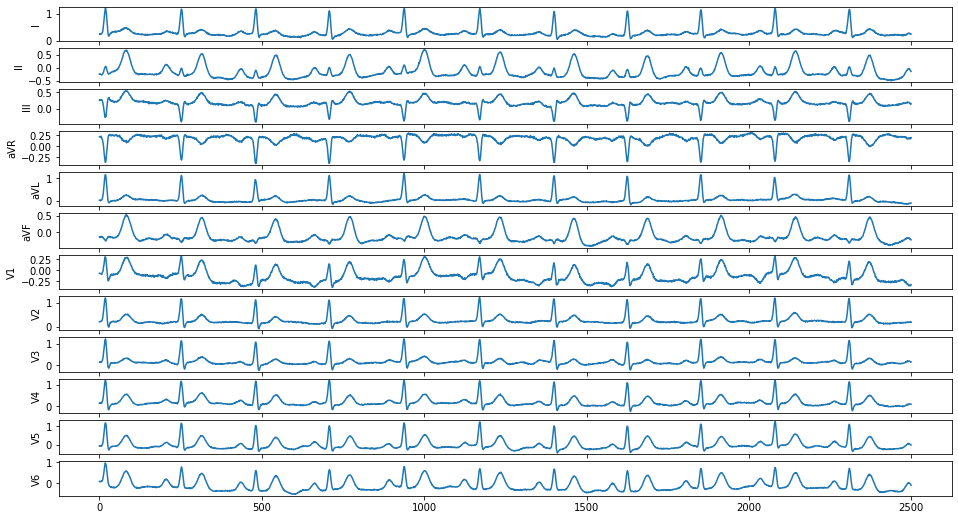

In [16]:
ecg_plot(data,labels)

In [6]:
data.shape # number of training examples, number of leads, number of datapoints

(6, 12, 2500)

In [14]:
reshaped = np.transpose(data, axes=[0, 2, 1]) #switching data

In [15]:
reshaped.shape

(6, 2500, 12)

In [34]:
modified = []
for i,ecg in enumerate(reshaped):
    if labels[i]==1:
        modified.append(ecg*10)
    else:D+D
        modified.append(ecg)
modified = np.array(modified)

In [35]:
modified.shape

(6, 2500, 12)